In [6]:
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import statsmodels.tsa.stattools as ts
import datetime

yf.pdr_override()

In [124]:
covid_pharma_tickers = ['PFE', 'MRNA', 'JNJ', 'AZN', 'NVAX']
start = '2019-01-01'
end = datetime.datetime.now().date().strftime('%Y-%m-%d')
print(f"Period: {start} to {end}")

Period: 2019-01-01 to 2020-08-02


In [125]:
prices = pdr.get_data_yahoo(covid_pharma_tickers, start=start, end=end)['Adj Close']
prices.tail()

Symbols,PFE,MRNA,JNJ,AZN,NVAX
Date,,,,,
2020-07-27,37.176647,79.910004,147.179993,56.580002,139.600006
2020-07-28,38.642323,81.489998,146.830002,56.320000,148.600006
2020-07-29,38.879997,79.510002,146.539993,56.639999,145.360001
2020-07-30,38.740002,77.629997,146.839996,57.889999,146.619995
2020-07-31,38.480000,74.099998,145.759995,55.779999,143.100006


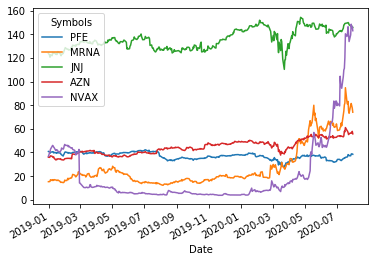

In [143]:
prices.plot()

In [127]:
from pandas.plotting import lag_plot, autocorrelation_plot

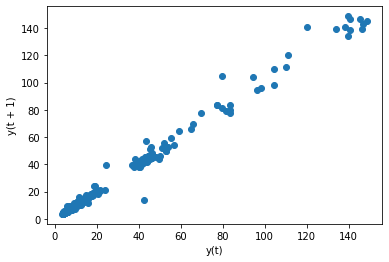

In [128]:
lag_plot(prices['NVAX'])

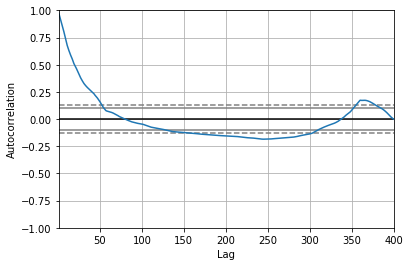

In [129]:
autocorrelation_plot(prices['NVAX'])

In [130]:
from statsmodels.graphics.tsaplots import plot_acf

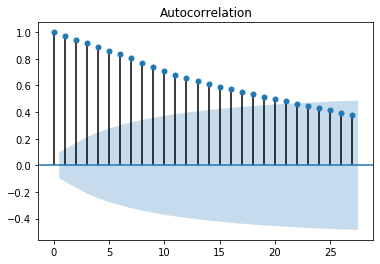

In [131]:
_ = plot_acf(prices['NVAX'])

In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

In [194]:
def analyse_AR(series, test_ratio=0.1):
#     X = series.values
    train, test = train_test_split(series, test_size=test_ratio, shuffle=False)
    start = train.index[-1].to_pydatetime()
    end = test.index[-1].to_pydatetime()
    print(f'Prediction from {start} to {end}')
    # train autoregression
    m = AR(train)
    m_fit = m.fit()
    print(f"Lag: {m_fit.k_ar}")
    print(f"Coefficients: {m_fit.params}")
    # make predictions
    predictions = m_fit.predict(start=len(train), end=len(series)-1)
    for i in range(len(predictions)):
        print(f'predicted={predictions.values[i]}, expected={test.values[i]}')
    print(predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f'Test RMSE: {rmse}')
    # plot result
    plt.plot(test.values)
    plt.plot(predictions.values, color='red')
    plt.show()

Prediction from 2020-06-04 00:00:00 to 2020-07-31 00:00:00
Lag: 17
Coefficients: const       0.232818
L1.NVAX     1.037464
L2.NVAX    -0.090785
L3.NVAX     0.042882
L4.NVAX     0.125146
L5.NVAX    -0.062863
L6.NVAX    -0.050090
L7.NVAX    -0.026621
L8.NVAX    -0.038986
L9.NVAX     0.099910
L10.NVAX   -0.069415
L11.NVAX   -0.056153
L12.NVAX    0.103359
L13.NVAX   -0.001904
L14.NVAX   -0.028217
L15.NVAX   -0.035638
L16.NVAX    0.136310
L17.NVAX   -0.102931
dtype: float64
predicted=45.53635747361836, expected=46.29999923706055
predicted=44.966036008548514, expected=44.790000915527344
predicted=43.6009962310913, expected=45.93000030517578
predicted=43.60924459400383, expected=44.959999084472656
predicted=42.75416442273246, expected=44.43000030517578
predicted=42.650484631346984, expected=45.56999969482422
predicted=41.54724316057609, expected=51.06999969482422
predicted=39.62326363596955, expected=52.150001525878906
predicted=39.759348449946216, expected=55.40999984741211
predicted=39.5555

/Users/kyle.nguyen/miniconda3/envs/quant/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATIO

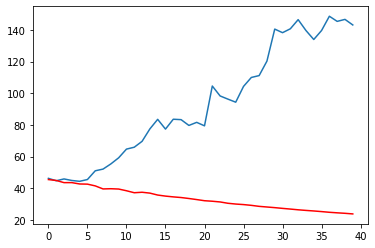

In [195]:
analyse_AR(X)

In [203]:
def analyse_ARIMA(series, test_ratio=0.1):
#     X = series.values
    train, test = train_test_split(series, test_size=test_ratio, shuffle=False)
    start = train.index[-1].to_pydatetime()
    end = test.index[-1].to_pydatetime()
    print(f'Prediction from {start} to {end}')
    # train autoregression
    m = ARIMA(train, order=(17, 1, 0))
    m_fit = m.fit()
    print(m_fit.summary())
    # plot residual
    residuals = pd.DataFrame(m_fit.resid)
    residuals.plot()
    residuals.plot(kind='kde')
    # make predictions
#     predictions = m_fit.predict(start=len(train), end=len(series)-1)
#     for i in range(len(predictions)):
#         print(f'predicted={predictions[i]}, expected={test[i]}')
#     print(predictions)
#     rmse = np.sqrt(mean_squared_error(test, predictions))
#     print(f'Test RMSE: {rmse}')
#     # plot result
#     plt.plot(test.values)
#     plt.plot(predictions.values, color='red')
#     plt.show()

Prediction from 2020-06-04 00:00:00 to 2020-07-31 00:00:00


/Users/kyle.nguyen/miniconda3/envs/quant/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kyle.nguyen/miniconda3/envs/quant/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.NVAX   No. Observations:                  359
Model:                ARIMA(17, 1, 0)   Log Likelihood                -777.550
Method:                       css-mle   S.D. of innovations              2.109
Date:                Sun, 02 Aug 2020   AIC                           1593.099
Time:                        14:30:54   BIC                           1666.883
Sample:                             1   HQIC                          1622.440
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0320      0.133      0.240      0.810      -0.228       0.292
ar.L1.D.NVAX      0.0508      0.053      0.961      0.336      -0.053       0.154
ar.L2.D.NVAX     -0.0398      0.053     

NameError: name 'plot' is not defined

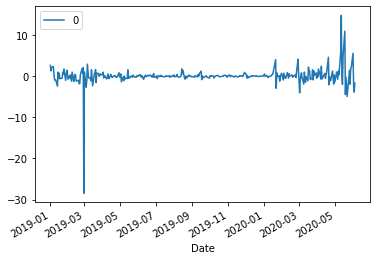

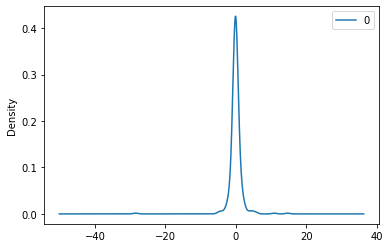

In [204]:
analyse_ARIMA(X)